In [1]:
import random
import numpy as np

class agent:
    def __init__(self, ms, mo, ps, po, learing_rate, tag):
        self.ms = ms
        self.mo = mo
        self.ps = ps
        self.po = po
        self.learing_rate = learing_rate
        self.tag = tag
        self.pay_off = 0

    def dicide_strategy(self, another_agent):
        # same group
        if self.tag == another_agent.tag:
            # paly
            if random.uniform(0, 1) <= self.ms:
                # cooperate
                if random.uniform(0, 1) <= self.ps:
                    return 1 # 0: not play, 1: cooperate, 2: defect
                # defect
                else:
                    return 2
            # not play
            else:
                return 0

        # other group
        else:
            # paly
            if random.uniform(0, 1) <= self.mo:
                # cooperate
                if random.uniform(0, 1) <= self.po:
                    return 1 # 0: not play, 1: cooperate, 2: defect
                # defect
                else:
                    return 2
            # not play
            else:
                return 0

    def update(self, pay_off, another_agent_tag, another_agent_strategy):
        self.pay_off = pay_off
        if another_agent_strategy == 1:
            if another_agent_tag == self.tag:
                self.ms += self.learing_rate
                self.ps += self.learing_rate
            else:
                self.mo += self.learing_rate
                self.po += self.learing_rate
        elif another_agent_strategy == 2:
            if another_agent_tag == self.tag:
                self.ms -= self.learing_rate
                self.ps -= self.learing_rate
            else:
                self.mo -= self.learing_rate
                self.po -= self.learing_rate

        if self.ms > 1: self.ms = 1
        if self.mo > 1: self.mo = 1 
        if self.ps > 1: self.ps = 1 
        if self.po > 1: self.po = 1 
        if self.ms < 0: self.ms = 0
        if self.mo < 0: self.mo = 0 
        if self.ps < 0: self.ps = 0 
        if self.po < 0: self.po = 0 

def encounter(a_agent, b_agent):
    a_strategy = a_agent.dicide_strategy(b_agent)
    b_strategy = b_agent.dicide_strategy(a_agent)

    # a:c, b:c
    if a_strategy == 1 and b_strategy == 1:
        a_agent.update(1, b_agent.tag, b_strategy)
        b_agent.update(1, a_agent.tag, a_strategy)
    # a:c, b:d
    elif a_strategy == 1 and b_strategy == 2:
        a_agent.update(-2, b_agent.tag, b_strategy)
        b_agent.update(2, a_agent.tag, a_strategy)
    # a:d, b:c
    elif a_strategy == 2 and b_strategy == 1:
        a_agent.update(2, b_agent.tag, b_strategy)
        b_agent.update(-2, a_agent.tag, a_strategy)
    # a:d, b:d
    elif a_strategy == 2 and b_strategy == 2:
        a_agent.update(-1, b_agent.tag, b_strategy)
        b_agent.update(-1, a_agent.tag, a_strategy)
    # unconsumated play
    elif a_strategy == 0 or b_strategy == 0:
        a_agent.update(0, 0, 0)
        b_agent.update(0, 0, 0)
        return 0 # unconsumated

    if a_agent.tag == b_agent.tag:
        return 1 # consumated play with "same" category
    else:
        return 2 # consumated play with "other" category

class lattice:
    def __init__(self, i_num:int, j_num:int, ms, mo, ps, po, learing_rate, search_rule:bool):
        self.agents = []
        for i in range(i_num):
            self.agents.append(agent(ms, mo, ps, po, learing_rate, "i"))
        for j in range(j_num):
            self.agents.append(agent(ms, mo, ps, po, learing_rate, "j"))
        self.i_num = i_num
        self.j_num = j_num
        self.size = len(self.agents)
        self.round_num = 0
        self.search_rule = search_rule
    
    def one_round(self, info_type):
        plays_with_same_num = 0
        plays_with_other_num = 0

        idx = list(range(self.size))
        if not self.search_rule:
            random.shuffle(idx)
            for i in range(0, len(idx), 2):
                outcome = encounter(self.agents[idx[i]], self.agents[idx[i+1]])
                if outcome == 1:
                    plays_with_same_num += 2 # 一次賽局，算「兩方」完成一次的play
                if outcome == 2:
                    plays_with_other_num += 2
        else:
            pass # 尚未完成search rule (p.1023, 1028)


        self.round_num += 1

        # For Figure 2.
        if info_type == 1:
            values = [(agent.ms, agent.mo, agent.ps, agent.po, agent.pay_off) for agent in self.agents]
            return [self.round_num, *list(np.array(values).mean(axis=0)), plays_with_same_num, plays_with_other_num] 
        # For Figure 3. & 4.
        if info_type == 2:
            majority_values = [(agent.ms, agent.mo, agent.pay_off) for agent in self.agents[:i_num]] 
            minority_values = [(agent.ms, agent.mo, agent.pay_off) for agent in self.agents[i_num:]] 
            return [self.round_num, *list(np.array(majority_values).mean(axis=0)), *list(np.array(minority_values).mean(axis=0)), np.array([agent.pay_off for agent in self.agents]).mean()]

# Figure 2.

In [25]:
random.seed(2)
np.random.seed(2)

# set parameters
ms = 0.6
mo = 0.58
ps = 0.6
po = 0.6
learing_rate = 0.01
iteration_num = 500
i_num = 500
j_num = 500
search_rule = False

MyLattice_F2 = lattice(i_num, j_num, ms, mo, ps, po, learing_rate, search_rule)

records_F2 = {'Iteration':[], 'exp_same': [], 'exp_other': [], 'co_same': [], 'co_other': [], 'Averaged payoff': [], 'playN_same': [], 'playN_other': []}
for i in range(iteration_num):
    record = MyLattice_F2.one_round(info_type=1)
    records_F2['Iteration'].append(record[0])
    records_F2['exp_same'].append(record[1])
    records_F2['exp_other'].append(record[2])
    records_F2['co_same'].append(record[3])
    records_F2['co_other'].append(record[4])
    records_F2['Averaged payoff'].append(record[5])
    records_F2['playN_same'].append(record[6])
    records_F2['playN_other'].append(record[7])

# Run A "simple society" For Figure 2.D
MyLattice_F2_simple = lattice(i_num+j_num, 0, ms, mo, ps, po, learing_rate, search_rule)
records_F2_simple = {'Averaged payoff': []}
for i in range(iteration_num):
    record = MyLattice_F2_simple.one_round(info_type=1)
    records_F2_simple['Averaged payoff'].append(record[5])

## Figure 2.A

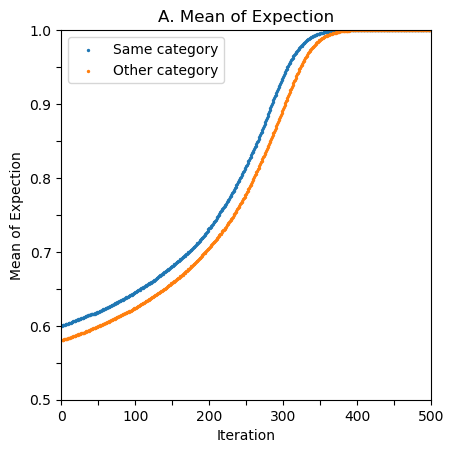

In [26]:
import matplotlib.pyplot as plt 
from matplotlib import colors as c
from matplotlib import style
from matplotlib.ticker import FormatStrFormatter
style.use('default')

fig, ax = plt.subplots(1,1)

x = records_F2['Iteration']
ax.scatter(x, records_F2['exp_same'], s=2, label='Same category')
ax.scatter(x, records_F2['exp_other'], s=2, label='Other category')

# 調整外觀
plt.title("A. Mean of Expection")
plt.xlabel("Iteration")
plt.ylabel("Mean of Expection")
plt.legend(loc='upper left')
plt.tick_params(direction="out")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 500.1, step=50))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0.5, 1)
plt.yticks(np.arange(0.5, 1.01, step=0.05))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 2.B

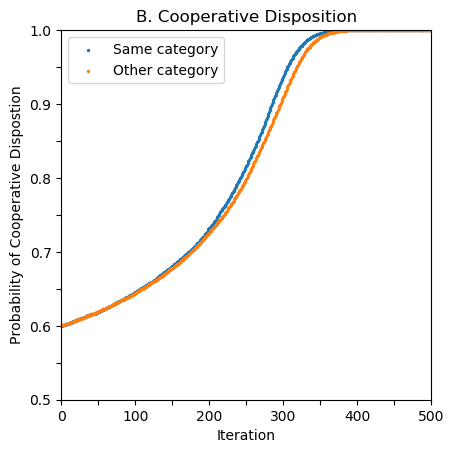

In [27]:
fig, ax = plt.subplots(1,1)

x = records_F2['Iteration']
ax.scatter(x, records_F2['co_same'], s=2, label='Same category')
ax.scatter(x, records_F2['co_other'], s=2, label='Other category')

plt.title("B. Cooperative Disposition")
plt.xlabel("Iteration")
plt.ylabel("Probability of Cooperative Dispostion")
plt.legend(loc='upper left')
plt.tick_params(direction="out")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 500.1, step=50))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0.5, 1)
plt.yticks(np.arange(0.5, 1.01, step=0.05))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 2. C

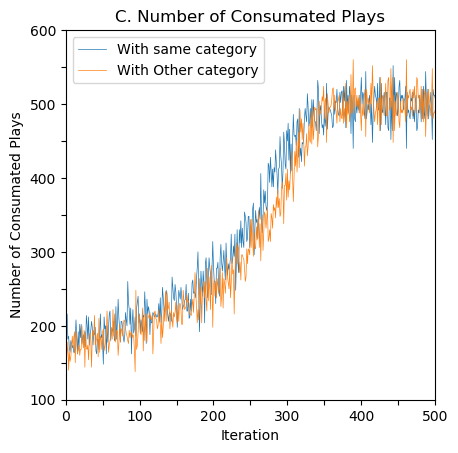

In [28]:
fig, ax = plt.subplots(1,1)

x = records_F2['Iteration']
ax.plot(x, records_F2['playN_same'], linewidth=0.5, label='With same category')
ax.plot(x, records_F2['playN_other'], linewidth=0.5, label='With Other category')

plt.title("C. Number of Consumated Plays")
plt.xlabel("Iteration")
plt.ylabel("Number of Consumated Plays")
plt.legend(loc='upper left')
plt.tick_params(direction="out")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 500.1, step=50))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(100, 600)
plt.yticks(np.arange(100, 601, step=50))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 2.D

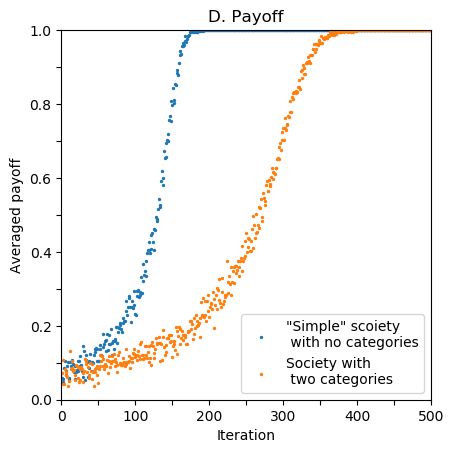

In [29]:
fig, ax = plt.subplots(1,1)

x = records_F2['Iteration']
ax.scatter(x, records_F2_simple['Averaged payoff'], s=2, label='"Simple" scoiety \n with no categories')
ax.scatter(x, records_F2['Averaged payoff'], s=2, label='Society with \n two categories')

plt.title("D. Payoff")
plt.xlabel("Iteration")
plt.ylabel("Averaged payoff")
plt.legend(loc='lower right')
plt.tick_params(direction="out")
plt.xlim(0, 500)
plt.xticks(np.arange(0, 500.1, step=50))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0.5, 1)
plt.yticks(np.arange(0, 1.01, step=0.1))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

# Figure 3

In [240]:
# set parameters
ms = 0.6
mo = 0.6
ps = 0.6
po = 0.6
learing_rate = 0.01
iteration_num = 1000
i_num = 800 # "i" have to be majority
j_num = 200
search_rule = False

MyLattice_F3 = lattice(i_num, j_num, ms, mo, ps, po, learing_rate, search_rule)

records_F3 = {'Iteration':[], 'exp_same_maj': [],  'exp_other_maj': [],  'payoff_maj': [],  'exp_same_min': [],  'exp_other_min': [],  'payoff_min': [],  'Averaged payoff': []}
for i in range(iteration_num):
    record = MyLattice_F3.one_round(2)
    records_F3['Iteration'].append(record[0])
    records_F3['exp_same_maj'].append(record[1])
    records_F3['exp_other_maj'].append(record[2])
    records_F3['payoff_maj'].append(record[3])
    records_F3['exp_same_min'].append(record[4])
    records_F3['exp_other_min'].append(record[5])
    records_F3['payoff_min'].append(record[6])
    records_F3['Averaged payoff'].append(record[7])

# Run A "simple society" For Figure 2.D
MyLattice_F3_simple = lattice(i_num+j_num, 0, ms, mo, ps, po, learing_rate, search_rule)
records_F3_simple = {'Averaged payoff': []}
for i in range(iteration_num):
    record = MyLattice_F3_simple.one_round(2)
    records_F3_simple['Averaged payoff'].append(record[7])

## Figure 3.A

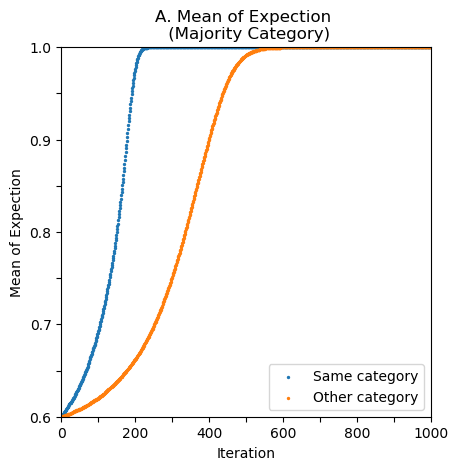

In [241]:
fig, ax = plt.subplots(1,1)

x = records_F3['Iteration']
ax.scatter(x, records_F3['exp_same_maj'], s=2, label='Same category')
ax.scatter(x, records_F3['exp_other_maj'], s=2, label='Other category')

plt.title("A. Mean of Expection \n (Majority Category)")
plt.xlabel("Iteration")
plt.ylabel("Mean of Expection")
plt.legend(loc='lower right')
plt.tick_params(direction="out")
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000.1, step=100))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0.6, 1)
plt.yticks(np.arange(0.6, 1.01, step=0.05))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 3.B

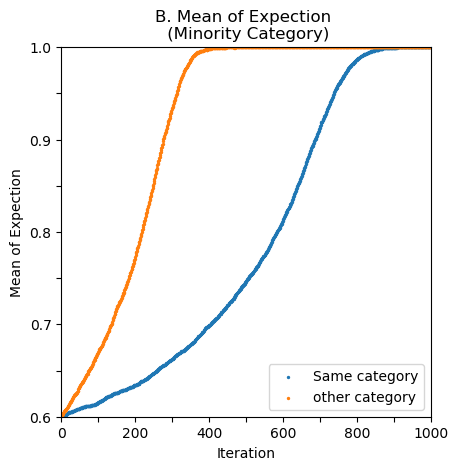

In [242]:
fig, ax = plt.subplots(1, 1)

ax.scatter(x, records_F3['exp_same_min'], s=2, label='Same category')
ax.scatter(x, records_F3['exp_other_min'], s=2, label='other category')

plt.title("B. Mean of Expection \n (Minority Category)")
plt.legend(loc='lower right')
plt.xlabel("Iteration")
plt.ylabel("Mean of Expection")
plt.tick_params(direction="out")
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000.1, step=100))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0.6, 1)
plt.yticks(np.arange(0.6, 1.01, step=0.05))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 3.C

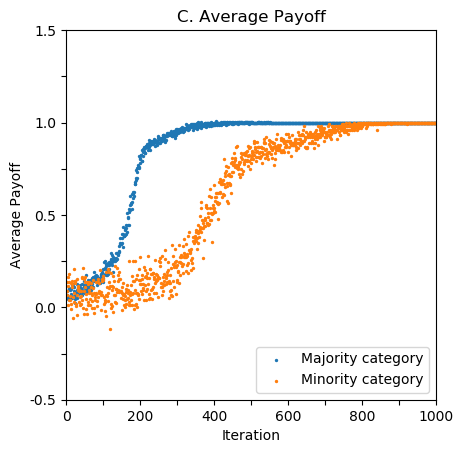

In [243]:
fig, ax = plt.subplots(1, 1)

ax.scatter(x, records_F3['payoff_maj'], s=2, label='Majority category')
ax.scatter(x, records_F3['payoff_min'], s=2, label='Minority category')


plt.title("C. Average Payoff")
plt.xlabel("Iteration")
plt.ylabel("Average Payoff")
plt.legend(loc='lower right')
plt.tick_params(direction="out")
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000.1, step=100))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.51, step=0.25))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()

## Figure 3.D

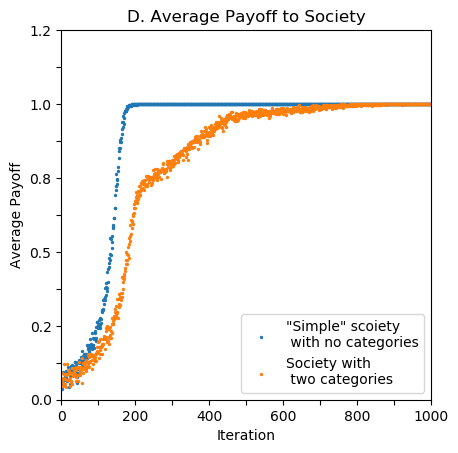

In [244]:
fig, ax = plt.subplots(1, 1)

ax.scatter(x, records_F3_simple['Averaged payoff'], s=2, label='"Simple" scoiety \n with no categories')
ax.scatter(x, records_F3['Averaged payoff'], s=2, label='Society with \n two categories')

plt.title("D. Average Payoff to Society")
plt.xlabel("Iteration")
plt.ylabel("Average Payoff")
plt.legend(loc='lower right')
plt.tick_params(direction="out")
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000.1, step=100))
for i, tick in enumerate(ax.get_xticklabels()):
    if i % 2 != 0: tick.set_visible(False)
plt.ylim(0, 1.2)
plt.yticks(np.arange(0, 1.3, step=0.125))
for i, tick in enumerate(ax.get_yticklabels()):
    if i % 2 != 0: tick.set_visible(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect(1/ax.get_data_ratio())

plt.show()